<a href="https://colab.research.google.com/github/omardrho/Electricity-Fraud-Detection/blob/main/Electricity_Conso_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import datetime
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as SM
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score

Data Acquisition


In [ ]:
df=pd.read_csv('/content/data.csv')

Discovering and preprocessing the data

In [ ]:
df.head(25)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
8,D0A186208CE83FBCCF730857C9A75B6F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.36,3.41,4.73,3.54,4.20,2.77,3.02,4.06,4.75,4.86
9,516954F5FF177CE314656D727FCC66A5,1,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
df['FLAG'].value_counts()

0    38757
1     3615
Name: FLAG, dtype: int64

In [ ]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [ ]:
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)

In [ ]:
import datetime

# Create a datetime object with "strptime": The date string must be in a specific format
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]

# Sort the dates
dates.sort()

# Convert back to strings using "strftime": The strftime() method takes one or more
# format codes as an argument and returns a formatted string based on it
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

# Convert to a list and add the other sorted columns
# Use line 81 of this file
cols = df.columns.tolist()[0:2] + sorteddates

# Set the new column names
df.columns = cols

# Print the new column names
print(df.columns)

Index(['CONS_NO', 'FLAG', '2014/01/01', '2014/01/02', '2014/01/03',
       '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07', '2014/01/08',
       ...
       '2016/10/22', '2016/10/23', '2016/10/24', '2016/10/25', '2016/10/26',
       '2016/10/27', '2016/10/28', '2016/10/29', '2016/10/30', '2016/10/31'],
      dtype='object', length=1036)


Text(0, 0.5, 'conso')

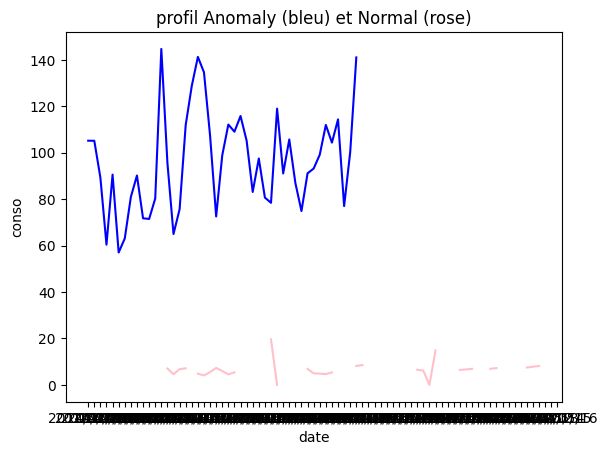

In [ ]:
plot1 = plt. figure(1)
# # # plt.figure(dpi=100)
plt.plot(df.columns[60:140],df.iloc[22,60:140].values, color = 'blue')
plt.plot(df.columns[60:140],df.iloc[42362,60:140].values, color = 'pink')
# # # plt.scatter(X, color = 'green')
plt.title('profil Anomaly (bleu) et Normal (rose)')
plt.xlabel('date')
plt.ylabel('conso')

In [ ]:
df1=df


# conversion vers une liste

l=df1["2014/01/01"]
l1=df1["2014/01/02"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()


# Remplacement des cases nan de la première colonne par 0 si i+1
# est nan et par i+1/2 si i+1 n'est pas nan

# print (df1["2014/01/01"])

l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2014/01/01"]=l2

l=df1["2016/10/31"]
l1=df1["2016/10/30"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()


# Remplacement des cases nan de l'avant dernière colonne par 0 si i+1
# est nan et par i+1/2 si i+1 n'est pas nan


l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2016/10/31"]=l2

# Pre-processing en remplacant les Nan par la moyenne des élements suivant et précedent - mieux que de les remplacer par des 0, des moyennes de lignes ou de supprimer les lignes

l=df1.columns
la=['CONS_NO','FLAG']
lbx=[]
for i in l:
    if i not in la:
        lbx.append(i)


for i in range(1,len(lbx)-1):
    l=np.asarray(df1[lbx[i]]).tolist()
    l1=np.asarray(df1[lbx[i-1]]).tolist()
    l2=np.asarray(df1[lbx[i+1]]).tolist()
    l3=[]
    for j in range(len(l)):
        if math.isnan(l[j]):
            if math.isnan(l1[j])==False and math.isnan(l2[j])==False:
                l3.append((l1[j]+l2[j])/2)
            else:
                l3.append(0)
        else:
            l3.append(l[j])
    df1[lbx[i]]=l3


Text(0, 0.5, 'conso')

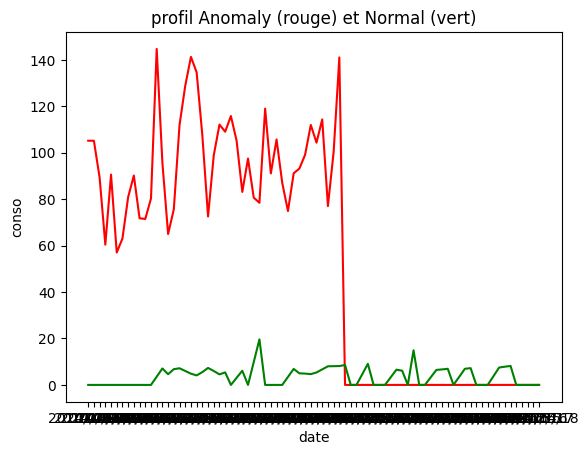

In [ ]:
plot2 = plt.figure(2)

plt.plot(df1.columns[60:140],df1.iloc[22,60:140].values, color = 'red')
plt.plot(df1.columns[60:140],df1.iloc[42362,60:140].values, color = 'green')
# # # plt.scatter(X, color = 'green')
plt.title('profil Anomaly (rouge) et Normal (vert)')
plt.xlabel('date')
plt.ylabel('conso')

Data Balancing

In [ ]:


X=df1[lbx[:]]
print ('X', X)
Y=df1["FLAG"]
print ('Y',Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

print ('X_train', X_train)
print ('Y_train', Y_train)

# sm=SM(random_state=42)
sm=SM()

#X_tr,Y_tr=sm.fit_sample(X_train,Y_train)
X_tr,Y_tr=sm.fit_resample(X_train,Y_train)

X        2014/01/01  2014/01/02  2014/01/03  2014/01/04  2014/01/05  2014/01/06  \
0            0.00        0.00        0.00        0.00        0.00        0.00   
1            0.00        0.00        0.00        0.00        0.00        0.00   
2            0.00        0.00        0.00        0.00        0.00        0.00   
3            0.00        0.00        0.00        0.00        0.00        0.00   
4            2.90        5.64        6.99        3.32        3.61        5.35   
...           ...         ...         ...         ...         ...         ...   
42367        0.00        0.00        0.00        0.00        0.00        0.00   
42368        2.70        0.00        0.00        5.72        6.05        5.81   
42369        0.58        1.16        0.92        0.98        1.54        1.38   
42370       16.89       15.15       19.28       17.19       16.80       17.48   
42371        0.00        0.00        0.00        0.00        0.00        0.00   

       2014/01/07  2014/0

Original dataset shape Counter({0: 30990, 1: 2907})
Resample dataset shape Counter({1: 30990, 0: 30990})
X_tr        2014/01/01  2014/01/02  2014/01/03  2014/01/04  2014/01/05  2014/01/06  \
0        0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1        5.230000    4.180000    4.580000    3.610000    4.710000    3.420000   
2        4.100000    4.220000    5.580000    4.020000    6.870000    4.020000   
3        1.920000    3.050000    1.730000    2.940000    4.410000    2.520000   
4        5.590000    3.920000    2.150000    2.170000    4.850000    4.810000   
...           ...         ...         ...         ...         ...         ...   
61975   22.410528   24.531421   24.952057   23.400858   25.832241   21.647847   
61976    9.664717   10.513032   12.015653   12.340634   11.450073    9.593180   
61977    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
61978   11.375535    8.575446    8.623629    8.577905    9.401196    8.807994   

Text(0, 0.5, 'conso')

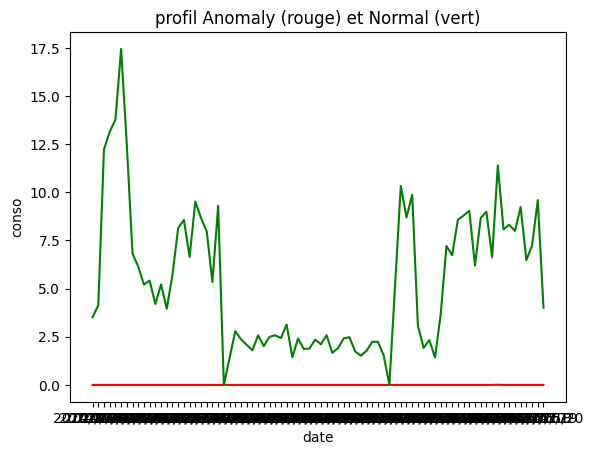

In [ ]:
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(Y_tr))
print ('X_tr', X_tr)
print ('Y_tr', Y_tr)


plot3 = plt. figure(3)

plt.plot(X_tr.columns[60:140],X_tr.iloc[22,60:140].values, color = 'red')
plt.plot(X_tr.columns[60:140],X_tr.iloc[58362,60:140].values, color = 'green')
# # # plt.scatter(X, color = 'green')
plt.title('profil Anomaly (rouge) et Normal (vert)')
plt.xlabel('date')
plt.ylabel('conso')

#### Random Forest

In [ ]:
# # # # # # # # # # Modèle de classification RandomForest  # # # # # # # # # # # # # # 
clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=300)
clf.fit(X_tr, Y_tr)
y_pred_RF=clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_pred_RF))

0.727433628318584


#### KNN

In [ ]:
# # # # # # # # # # # Modèle de classification Knn  # # # # # # # # # # # # # # 
# from sklearn.neighbors import KNeighborsClassifier
# best_acc=np.zeros(8)
# for i in range(1,71):
#     knn_model=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
#     y_pred_knn=knn_model.predict(X_test)
#     best_acc[i-1]=accuracy_score(Y_test,y_pred_knn)
    
# plt.plot(range(1,71),best_acc,'b')
# plt.ylabel('Accuracy ')
# plt.xlabel('Number of Neighbors (K)')
# plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5).fit(X_tr,Y_tr)
y_pred_knn=knn_model.predict(X_test)

#### SVM

In [ ]:
# # # # # # # # # # Modèle de classification SVM  # # # # # # # # # # # # # # 
from sklearn import svm
SVM_model=svm.SVC(kernel='rbf')
SVM_model.fit(X_tr,Y_tr)
y_pred_svm=SVM_model.predict(X_test)

#### Logistic Regression

In [ ]:
# # # # # # # # # # Modèle de classification Logistic Regression  # # # # # # # # # # # # # # 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model=LogisticRegression(C=0.01,solver='liblinear').fit(X_tr,Y_tr)
y_pred_LR=LR_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### XGBoost

In [ ]:
# # # # # # # # # # Modèle de classification XGBoost  # # # # # # # # # # # # # # 
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# param = {}

In [ ]:
# xgb_grid = {'max_depth': [7,10,30],
#             'n_estimators': [100,200,300],
#             'learning_rate': [0.01,0.1,0.2,0.5],
#             'min_child_weight': [1, 3, 5],
#             'gamma': [0],
#             'subsample': [0.8],
#             'colsample_bytree': [0.8],
#             }

In [ ]:
# xgbc = XGBClassifier(param)
# xgbc_cv = GridSearchCV(estimator = xgbc, param_grid = xgb_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

In [ ]:
# xgbc_cv.fit(X_train, Y_train)

In [ ]:
# print('Best parameters: ', xgbc_cv.best_params_)
# print('Best score: ', xgbc_cv.best_score_)

In [ ]:
 from xgboost import XGBClassifier
best_xgbc = XGBClassifier()

In [ ]:
best_xgbc = XGBClassifier(#scale_pos_weight = scale_pos_weight,
                          #class_weights={0:0.71,1:10},
                          max_depth = 7,
                          min_child_weight = 1,
                          gamma = 0,
                          subsample = 0.8,
                          colsample_bytree = 0.8,
                          alpha = 0,
                          learning_rate = 0.01,
                          n_estimators = 300)

In [ ]:
best_xgbc.fit(X_tr,Y_tr)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
y_pred_xgboost=best_xgbc.predict(X_test)

#### Score Comparaison

In [ ]:
print(accuracy_score(Y_test,y_pred_knn))
print(accuracy_score(Y_test,y_pred_RF))
print(accuracy_score(Y_test,y_pred_LR))
print(accuracy_score(Y_test,y_pred_xgboost))

0.6858997050147493
0.727433628318584
0.5749852507374631
0.8265486725663717
